In [6]:
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

<Axes: >

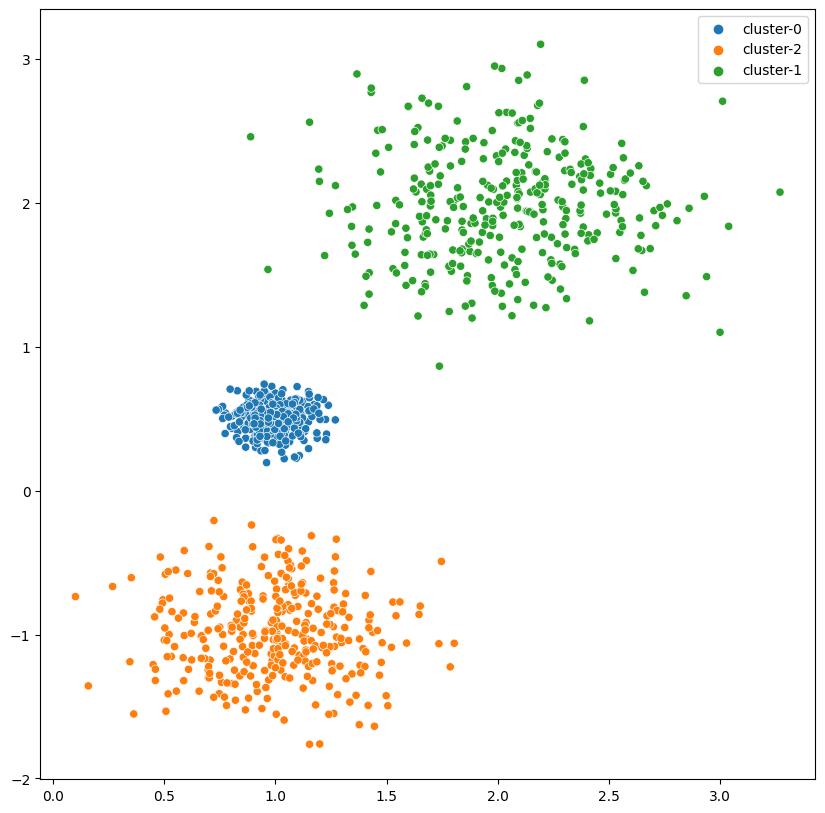

In [7]:
centers = [[1, 0.5], [2, 2], [1, -1]]
stds = [0.1, 0.4, 0.3]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state=0)
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=["cluster-{}".format(x) for x in labels_true])

<Axes: >

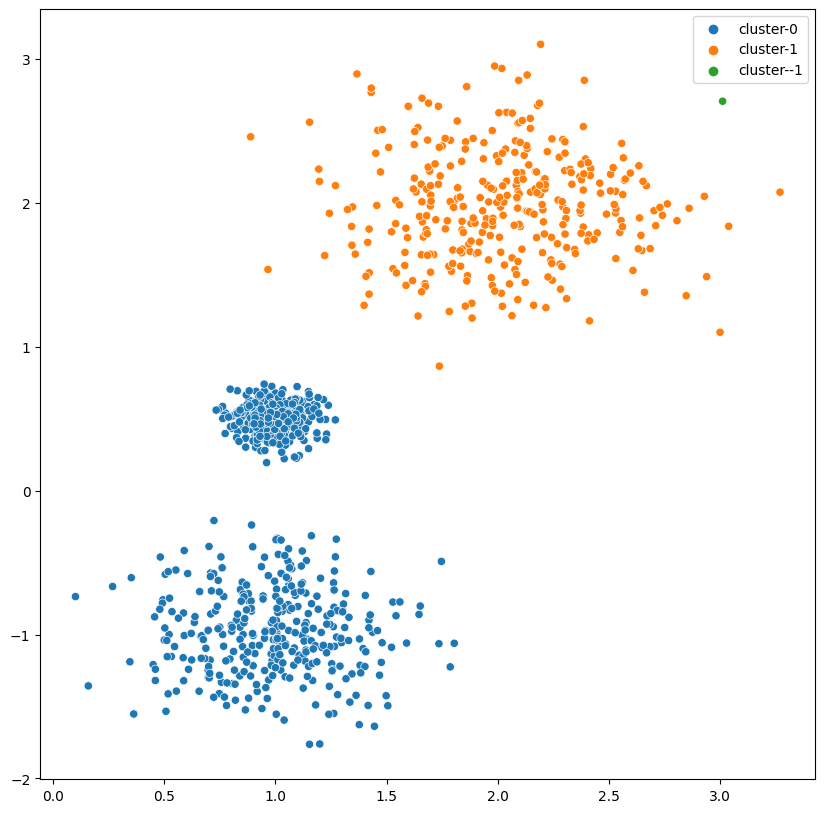

In [8]:
# Epsilon parameter of DBSCAN

db = DBSCAN(eps=0.5, min_samples=10).fit(X)
labels = db.labels_

fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=["cluster-{}".format(x) for x in labels])
# print(labels)

1.0
0.5
0.3333333333333333
0.25
0.2
0.16666666666666666
0.14285714285714285
0.125
0.1111111111111111
0.1


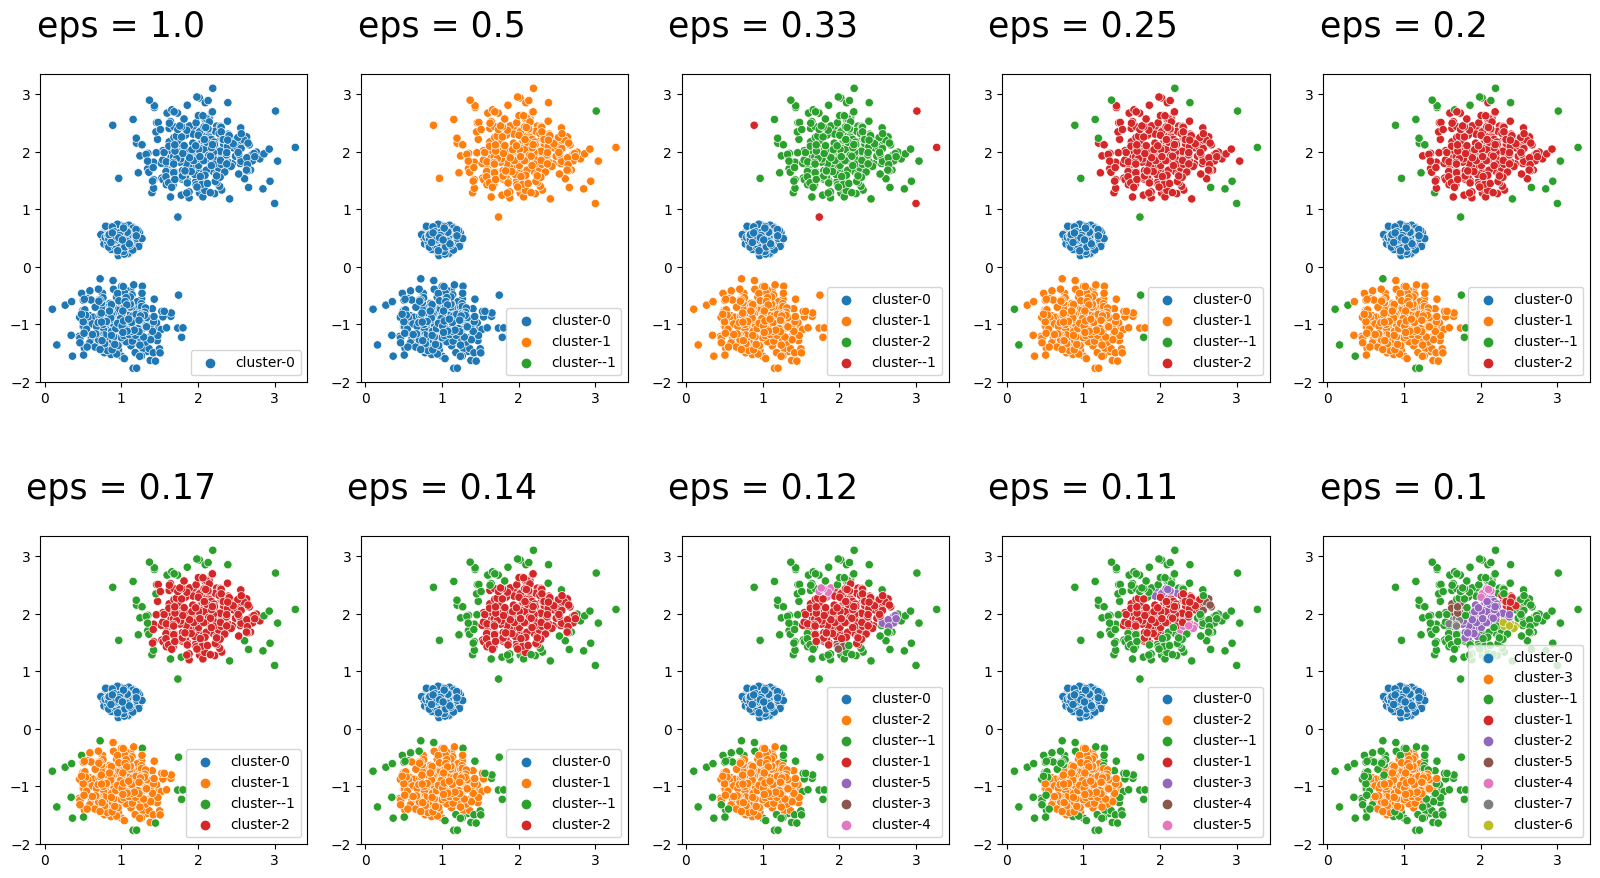

In [14]:
# Tuning EPS parameter

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1
for x in range(10, 0, -1):
    eps = 1/(11-x)
    db = DBSCAN(eps=eps, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    print(eps)
    
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 2)), fontsize=25, ha="center")
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=["cluster-{}".format(x) for x in labels])
    
    i += 1

### A Systematic Method for Tuning the eps Value

Since the eps figure is proportional to the expected number of neighbours discovered, we can use the nearest neighbours to reach a fair estimation for eps. Let us compute the nearest neighbours.

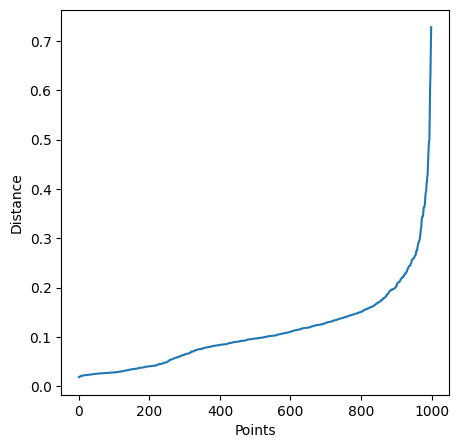

In [10]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,10], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig("Distance_curve.png", dpi=300)

Note that in the nearest neighbour calculation, the point itself will appear as the first nearest neighbour. So we seek the 11 nearest neighbours. We sort the distance to the 10th nearest neighbour and plot the distance variation. As we can see, the elbow point appears somewhere in between 0.1 and 0.3. I choose the 10th neighbour considering the fact that I pick 10 as min_samples value for clustering

### KneeLocator to Detect Elbow Point

Ville Satopaa et al. presented the paper “Finding a “Kneedle” in a Haystack: Detecting Knee Points in System Behavior” in the year 2011. In this article, for the purpose of detecting the elbow point (or knee point), I will be using their python library kneed. We can use the following code to find and plot the knee point.

https://kneed.readthedocs.io/en/stable/parameters.html

In [11]:
pip install kneed

  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


0.18723454491446345


<Figure size 500x500 with 0 Axes>

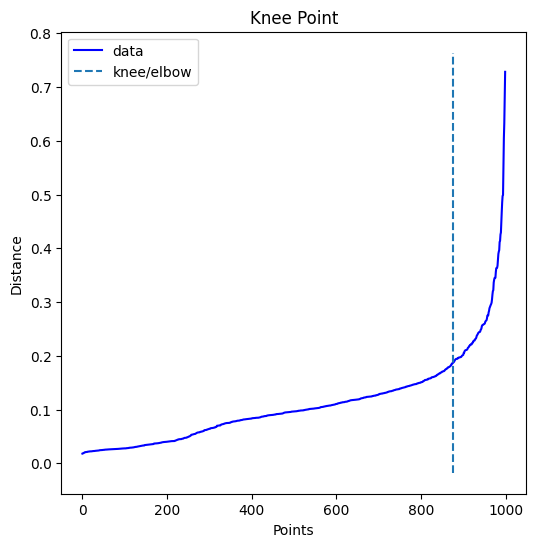

In [12]:
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])